In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Data

In [39]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
print( train_data.columns)
print( train_data.isnull().sum())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [41]:
train_data['Embarked'].fillna(value='S', inplace=True)
test_data['Fare'].fillna(value=test_data.Fare.mean(), inplace=True)

In [42]:
mean_age_miss = round(train_data[train_data["Name"].str.contains('Miss.', na=False)]['Age'].mean())
mean_age_mrs = round(train_data[train_data["Name"].str.contains('Mrs.', na=False)]['Age'].mean())
mean_age_mr = round(train_data[train_data["Name"].str.contains('Mr.', na=False)]['Age'].mean())
mean_age_master = round(train_data[train_data["Name"].str.contains('Master.', na=False)]['Age'].mean())

def fill_age(name_age):
    
    name = name_age[0]
    age = name_age[1]
    
    if pd.isnull(age):
        if 'Mr.' in name:
            return mean_age_mr
        if 'Mrs.' in name:
            return mean_age_mrs
        if 'Miss.' in name:
            return mean_age_miss
        if 'Master.' in name:
            return mean_age_master
        if 'Dr.' in name:
            return mean_age_master
        if 'Ms.' in name:
            return mean_age_miss
    else:
        return age

train_data['Age'] = train_data[['Name', 'Age']].apply(fill_age,axis=1)
test_data['Age'] = test_data[['Name', 'Age']].apply(fill_age,axis=1)


In [43]:
train_data['cabinLetter'] = train_data['Cabin'].astype(str).str[0]
cabinList = train_data['cabinLetter'].unique()

In [44]:
C_mean = round(train_data[train_data["cabinLetter"] == 'C']['Fare'].mean(),3)
E_mean = round(train_data[train_data["cabinLetter"] == 'E']['Fare'].mean(),3)
G_mean = round(train_data[train_data["cabinLetter"] == 'G']['Fare'].mean(),3)
D_mean = round(train_data[train_data["cabinLetter"] == 'D']['Fare'].mean(),3)
A_mean = round(train_data[train_data["cabinLetter"] == 'A']['Fare'].mean(),3)
B_mean = round(train_data[train_data["cabinLetter"] == 'B']['Fare'].mean(),3)

cabinMeanList = [0,0,0,0,0,0,0,0,0]
mean = 0
for i in range(9):
    if cabinList[i] != 'n':
        mean = round(train_data[train_data["cabinLetter"] == cabinList[i]]['Fare'].mean(),3)
        cabinMeanList[i] = mean


In [45]:

def reasign_cabin(cabin_fare):
    
    cabin = cabin_fare[0]
    fare = cabin_fare[1]
    
    if cabin=='n':
        if (fare <= 13.581):
            return 'G'
        if ((fare > 13.581) and (fare <= 18.697)):
            return 'F'
        if ((fare > 18.697) and (fare <= 35.5)):
            return 'T'
        if ((fare > 35.5) and (fare <= 39.624)):
            return 'A'
        if ((fare > 39.624) and (fare <= 46.027)):
            return 'E'
        if ((fare < 46.027) and (fare <= 57.245)):
            return 'D'
        if ((fare < 57.245) and (fare <= 100.151)):
            return 'C'
        if ((fare <= 113.506)):
            return 'B'
        else:
            return 'X'
    else:
        return cabin
      
train_data['Cabin'] = train_data[['cabinLetter', 'Fare']].apply(reasign_cabin, axis=1)


In [46]:
print( train_data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
cabinLetter    0
dtype: int64


In [47]:
age_data= train_data[["Age", "Survived"]]

# age_group = ["0-10", "11-20", "21-30", "31-40", "41-50", 
#              "51-60", "61-70", "71-80"]

for i in range(0, 80, 10):
    train_data.loc[(train_data['Age'] >=i ) & (train_data['Age'] <= i + 10 ), 'Age_Range'] = int(i/10)


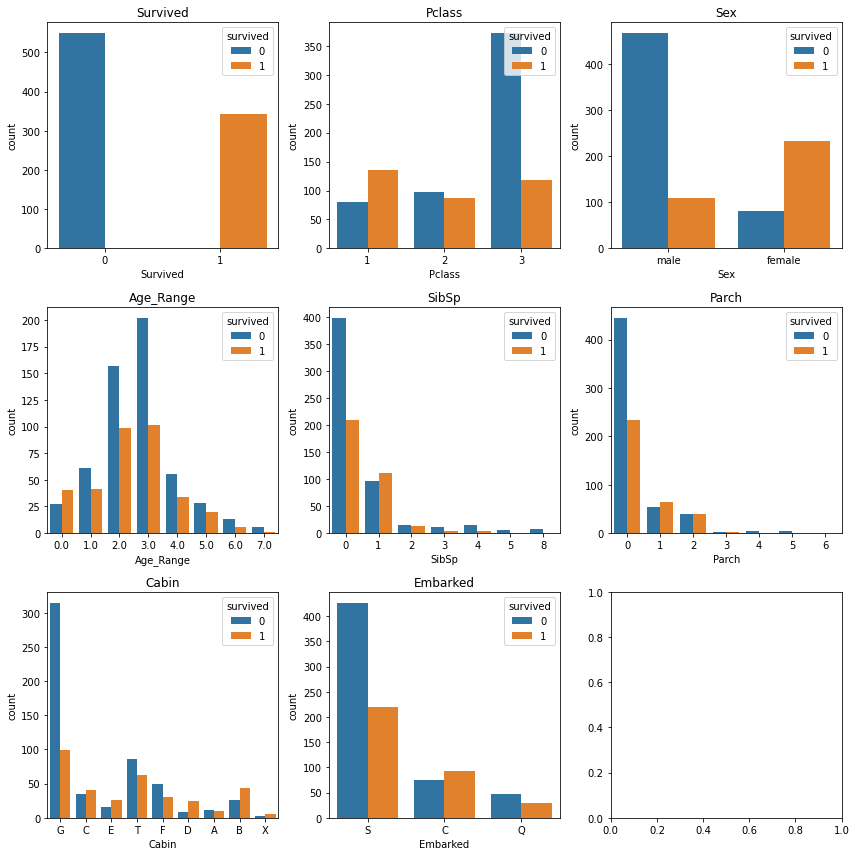

In [48]:
cols = ['Survived', 'Pclass', 'Sex', 'Age_Range', 'SibSp',
       'Parch', 'Cabin', 'Embarked']

n_rows = 3
n_cols = 3

fig, axs = plt.subplots(n_rows,n_cols,figsize = (n_cols * 4, n_rows * 4))

for r in range(0, n_rows):
    for c in range(0, n_cols):
   
        i = r * n_cols + c  
        if i < 8:
            ax = axs[r][c] 
            sns.countplot(train_data[cols[i]], hue = train_data['Survived'], ax= ax)
            ax.set_title(cols[i])
            ax.legend(title = 'survived', loc = 'upper right')

plt.tight_layout()

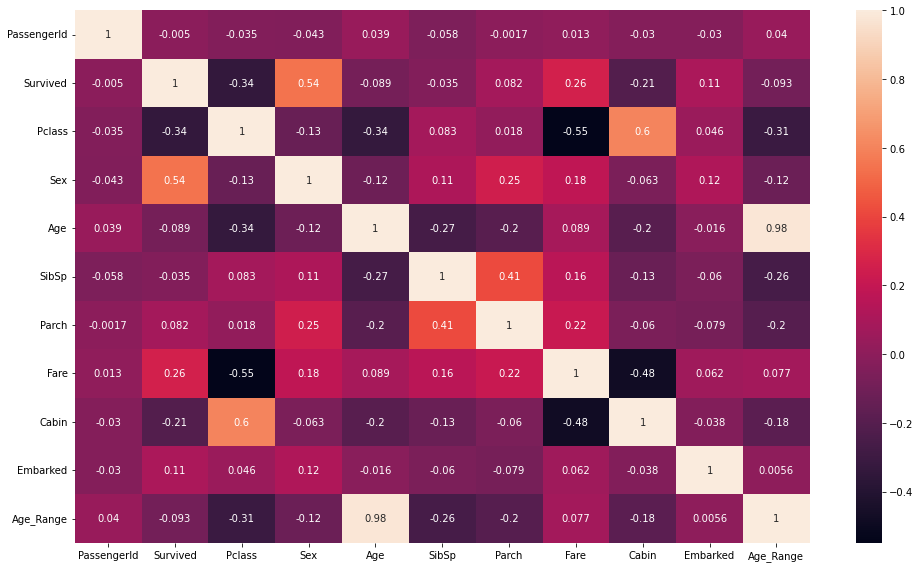

In [49]:
categories = {"female": 1, "male": 0}
train_data['Sex']= train_data['Sex'].map(categories)
test_data['Sex']= test_data['Sex'].map(categories)

categories = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked']= train_data['Embarked'].map(categories)
test_data['Embarked']= test_data['Embarked'].map(categories)

categories = train_data.Cabin.unique()
train_data['Cabin'] = train_data.Cabin.astype("category").cat.codes
test_data['Cabin'] = test_data.Cabin.astype("category").cat.codes


plt.figure(figsize=(14,8))
sns.heatmap(train_data.corr(), annot=True)
plt.tight_layout()

In [50]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabinLetter,Age_Range
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,6,1,n,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,2,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,6,1,n,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,1,C,3.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,6,1,n,3.0


In [51]:
train_data_less = train_data.drop(['PassengerId', 'Age', 'Name','Ticket', 'cabinLetter'], axis=1)
train_data_less.head(5)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_Range
0,0,3,0,1,0,7.2500,6,1,2.0
1,1,1,1,1,0,71.2833,2,2,3.0
2,1,3,1,0,0,7.9250,6,1,2.0
3,1,1,1,1,0,53.1000,2,1,3.0
4,0,3,0,0,0,8.0500,6,1,3.0


In [52]:
from sklearn.preprocessing import MinMaxScaler

LABEL = 'Survived'
y = train_data_less[LABEL]
train_data_less = train_data_less.drop(LABEL, axis=1) 

scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_data_less)


scaled_train = pd.DataFrame(scaled_train, columns=train_data_less.columns, index=train_data_less.index)

scaled_train.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_Range
0,1.0,0.0,0.125,0.0,0.014151,0.75,0.0,0.285714
1,0.0,1.0,0.125,0.0,0.139136,0.25,0.5,0.428571
2,1.0,1.0,0.000,0.0,0.015469,0.75,0.0,0.285714
3,0.0,1.0,0.125,0.0,0.103644,0.25,0.0,0.428571
4,1.0,0.0,0.000,0.0,0.015713,0.75,0.0,0.428571


Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("   Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))


   Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.84      0.83      0.83       115
           1       0.70      0.72      0.71        64

    accuracy                           0.79       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179



Support Vector Machine (SVM)

In [54]:
from sklearn.svm import SVC

svm_train_x = scaled_train
svm_train_y = y

x_train, x_test, y_train, y_test = train_test_split(svm_train_x, svm_train_y, test_size=0.2, stratify=y, random_state=0)


svm_model = SVC(probability=True, random_state=0)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       110
           1       0.91      0.57      0.70        69

    accuracy                           0.81       179
   macro avg       0.84      0.76      0.78       179
weighted avg       0.83      0.81      0.80       179



K-Nearest Neighbor

In [55]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_x = scaled_train
knn_train_y = y

x_train, x_test, y_train, y_test = train_test_split(knn_train_x, knn_train_y, test_size=0.2, stratify=y, random_state=0)

k_range = range(1,26)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print("k: {} Accuracy: {}".format(k, round(metrics.accuracy_score(y_test, y_pred),3)))


k: 1 Accuracy: 0.76
k: 2 Accuracy: 0.754
k: 3 Accuracy: 0.782
k: 4 Accuracy: 0.788
k: 5 Accuracy: 0.765
k: 6 Accuracy: 0.788
k: 7 Accuracy: 0.782
k: 8 Accuracy: 0.782
k: 9 Accuracy: 0.788
k: 10 Accuracy: 0.799
k: 11 Accuracy: 0.81
k: 12 Accuracy: 0.81
k: 13 Accuracy: 0.816
k: 14 Accuracy: 0.81
k: 15 Accuracy: 0.81
k: 16 Accuracy: 0.81
k: 17 Accuracy: 0.777
k: 18 Accuracy: 0.782
k: 19 Accuracy: 0.788
k: 20 Accuracy: 0.81
k: 21 Accuracy: 0.793
k: 22 Accuracy: 0.799
k: 23 Accuracy: 0.799
k: 24 Accuracy: 0.81
k: 25 Accuracy: 0.804


In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn_train_x = scaled_train
knn_train_y = y

x_train, x_test, y_train, y_test = train_test_split(knn_train_x, knn_train_y, test_size=0.2, stratify=y, random_state=0)


knn = KNeighborsClassifier(n_neighbors = 13)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       110
           1       0.86      0.62      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179



CNN

In [58]:
import tensorflow as tf
from tensorflow import keras
cnn_train_x = scaled_train
cnn_train_y = y

x_train, x_test, y_train, y_test = train_test_split(cnn_train_x, cnn_train_y, test_size=0.2, stratify=y, random_state=0)

tf.random.set_seed(42)

cnn = tf.keras.Sequential([
           tf.keras.layers.Dense(50, activation='relu'),
           tf.keras.layers.Dense(100, activation='relu'),
           tf.keras.layers.Dense(150, activation='relu'),
           tf.keras.layers.Dense(2, activation='softmax')
])


cnn.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

print("Accuracy: {}".format(metrics.accuracy_score(y_test, y_pred)))
print(classification_report(y_test,y_pred))

cnn.fit(cnn_train_x, 
        tf.one_hot(cnn_train_y, depth=2), 
        epochs=250,
        verbose = 1,
        validation_data=(x_test, tf.one_hot(y_test, depth=2)))

Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       110
           1       0.86      0.62      0.72        69

    accuracy                           0.82       179
   macro avg       0.83      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179

Epoch 1/250
28/28 [==============================] - 1s 7ms/step - loss: 0.6903 - accuracy: 0.6049 - val_loss: 0.6812 - val_accuracy: 0.6927
Epoch 2/250
28/28 [==============================] - 0s 2ms/step - loss: 0.6722 - accuracy: 0.7464 - val_loss: 0.6657 - val_accuracy: 0.7263
Epoch 3/250
28/28 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.7520 - val_loss: 0.6474 - val_accuracy: 0.7486
Epoch 4/250
28/28 [==============================] - 0s 2ms/step - loss: 0.6314 - accuracy: 0.7710 - val_loss: 0.6265 - val_accuracy: 0.7654
Epoch 5/250
28/28 [==============================] - 0s 2ms/step - loss: 0.6060 